<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Перименование-заголовков" data-toc-modified-id="Перименование-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Перименование заголовков</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Проработка-пропущенных-значений" data-toc-modified-id="Проработка-пропущенных-значений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проработка пропущенных значений</a></span></li><li><span><a href="#Изменение-типов-данных." data-toc-modified-id="Изменение-типов-данных.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изменение типов данных.</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Изучение-параметров:площадь,-цена,-число-комнат,-высота-потолков.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров:площадь, цена, число комнат, высота потолков.</a></span></li><li><span><a href="#Исключение-редких-и-выбивающихся-значений." data-toc-modified-id="Исключение-редких-и-выбивающихся-значений.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исключение редких и выбивающихся значений.</a></span></li><li><span><a href="#Изучение-параметра----время-продажи-квартиры" data-toc-modified-id="Изучение-параметра----время-продажи-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучение параметра -  время продажи квартиры</a></span></li><li><span><a href="#Факторы,--больше-всего-влияющие--на-стоимость-квартиры" data-toc-modified-id="Факторы,--больше-всего-влияющие--на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы,  больше всего влияющие  на стоимость квартиры</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')#загрузка и просмотр файла
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()#просмотр информации колонках, заголовки, пропущенных значений 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum().sort_values(ascending = False)#количество пропусков в каждом столбце 

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [5]:
miss_data = data.isna().sum() / len(data)
miss_data.sort_values(ascending = False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [6]:
data.shape

(23699, 22)

### Вывод

Представленный файл состоит из 23699 строк и 22 столбцов разного типа и содержания. При предспросмотре выявлено, что 14 столбцов имеют разное число пропущенных или не заполненных строк. Так как данные относятся к качественным и количественным, то в каждом случе будет выбран метод, соответствующий данным, в том числе и методы описательной статистики. 
Некоторые столбцы названы не по принятым нормам, требуется корректировка. 

## Предобработка данных

### Перименование заголовков 

In [7]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                     'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'}).head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


### Поиск дубликатов

In [8]:
data.duplicated().sum()

0

### Проработка пропущенных значений

Обработка пропущенных значений в столбце  locality_name — название населённого пункта. 
Всего пропущенно 49 наименований населеного пункта. Просто заменить данные любым другим невозможно, восполнить их нечем, нет уверенности, что это жилье в Санкт-Петербурге, возможно, что это из соседних населённых пунктах, поэтому самым оптимальным - удалить. 

In [9]:
data.dropna(subset =['locality_name'],inplace=True)
data['locality_name'].isna().sum()

0

Обработка пропущенных значений в столбце floors_total - всего этажей в доме. Всего  86 пропусков. Всего предствалены квартиры от одно- до 60 этажных домах. Больше всего квартир предаставлено в 5-х домах.Предполагаю, что, если не указано количество этажей в доме, то этаж всего один. Думаю, что уместнее будет заменить - 1 

In [10]:
data['floors_total'].isna().sum()

85

In [11]:
data['floors_total'].median()

9.0

In [12]:
data.groupby('floors_total')['floors_total'].count()

floors_total
1.0       25
2.0      381
3.0      667
4.0     1193
5.0     5775
6.0      910
7.0      589
8.0      388
9.0     3758
10.0    1174
11.0     202
12.0    1361
13.0     229
14.0     553
15.0     365
16.0    1375
17.0     833
18.0     505
19.0     339
20.0     271
21.0     158
22.0     286
23.0     349
24.0     462
25.0    1075
26.0     124
27.0     164
28.0      21
29.0       1
33.0       1
34.0       1
35.0      24
36.0       3
37.0       1
52.0       1
60.0       1
Name: floors_total, dtype: int64

In [13]:
data.loc[data['floors_total'].isna(),'floors_total'] = data['floors_total'].min()

In [14]:
data['floors_total'].isna().sum()

0

Обработка пропущенных значений в столбце living_area - жилая площадь в квадратных метрах. При просмотре данных подребнее были выявленны аномальные (на мой взгляд) значения типа - 2, 3, 5 жилой площади в квадратных метрах. Я, конечно, не исключаю реальность жизни в таком помщении, но из выборки считаю нужным удалить, оставить от 8. Остальные прпуски считаю нужным заменить медианым значением. 

In [15]:
data['living_area'].isna().sum()

1898

In [16]:
data.groupby('living_area')['living_area'].count().head(10)

living_area
2.0    2
3.0    2
5.0    1
5.4    1
6.0    1
6.5    1
8.0    2
8.3    1
8.4    1
8.5    1
Name: living_area, dtype: int64

In [17]:
data['living_area'].median()

30.0

In [18]:
data.loc[data['living_area'] <= 6.5]['living_area']
#находим строки


3242     3.0
13915    2.0
16431    6.0
17582    5.0
19251    6.5
21758    2.0
21943    5.4
23574    3.0
Name: living_area, dtype: float64

In [19]:
data = data.drop(index=[3242, 13915, 16431, 17582, 19251, 21758, 21943, 23574])#удаляем строчки

In [20]:
data['living_area'].min()

8.0

In [21]:
data.loc[data['living_area'].isna(),'living_area'] = data['living_area'].median()#замена пропущенных - мединой 

In [22]:
data['living_area'].isna().sum()

0

Обработка пропущенных значений в столбце kitchen_area — площадь кухни в квадратных метрах. Оптимальным решением - замена медианой. Она ближе к стандартной, площади в "панельном" доме. 

In [23]:
data['kitchen_area'].isna().sum()

2267

In [24]:
data['kitchen_area'].describe()

count    21375.000000
mean        10.565589
std          5.902068
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [25]:
data['kitchen_area'].median()

9.1

In [26]:
data.loc[data['kitchen_area'].isna(),'kitchen_area'] = data['kitchen_area'].median()#замена пропущенных - мединой 

In [27]:
data['kitchen_area'].isna().sum()

0

Обработка пропущенных значений в столбце balcony — число балконов. Продполагаю, где нет значений, значит балкона нет. 

In [28]:
data['balcony'] = data['balcony'].fillna(0)

Обработка пропущенных значений в столбце ceiling_height — высота потолков (м). Т.к. имеются стандарты по сторительству жилых многоквартирых домов, то стоит предположить, что пропуски допустимо заментить медианой. 

In [29]:
data['ceiling_height'].median()

2.65

In [30]:
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()#замена пропущенных - мединой 

Часть параметров, была получена автоматически на основе картографических данных, к таким относятся: 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м).
- parks_around3000 - число парков в радиусе 3 км.
- parks_nearest - расстояние до ближайшего водоёма (м).
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- cityCenters_nearest -расстояние до центра города (м)

Пропуски этих данных уместее будет заполнить медианым значением по группировке locality_name. 


In [31]:
data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'),inplace = True) 
#заменила пропуски на медиану по группировке 
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median()) 
#замена в итоговом слобце 

In [32]:
data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'),inplace = True)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['cityCenters_nearest'].isnull().sum()

0

In [33]:
data['parks_around3000'].fillna(data.groupby('locality_name')['parks_around3000'].transform('median'),inplace = True)
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['parks_around3000'].isnull().sum()

0

In [34]:
data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'),inplace = True)
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['parks_nearest'].isnull().sum()

0

In [35]:
data['ponds_around3000'].fillna(data.groupby('locality_name')['ponds_around3000'].transform('median'),inplace = True)
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['ponds_around3000'].isnull().sum()

0

In [36]:
data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'),inplace = True)
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['ponds_nearest'].isnull().sum()

0

Обработка пропущенных значений в столбце is_apartment - апартаменты. Предполагаю, что прпуски в данном столбце возникли, т.к. заполняющий мог не знать что поставить.

In [37]:
data['is_apartment']=data['is_apartment'].fillna(0) #заполняем 0-не аппартамент

Обработка пропущенных значений в столбце days_exposition - сколько дней было размещено объявление. При детальном расмотре данного показателя выявлено, что средняя очень сильно отличается от медианы, это связано с тем, что имеются большие выбросы по максимальному значению - 1 580 дней (более 4 лет в продаже). Предположительно, появление пустых значений свзано с тем, что человек мог просто не закрыть объявление после продажи. 

In [38]:
data['days_exposition'].describe()

count    20462.000000
mean       180.776561
std        219.811395
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [39]:
data['days_exposition'].median()

95.0

In [40]:
data.info() #проверка по пропущенным значениям 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23642 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23642 non-null  int64  
 1   last_price            23642 non-null  float64
 2   total_area            23642 non-null  float64
 3   first_day_exposition  23642 non-null  object 
 4   rooms                 23642 non-null  int64  
 5   ceiling_height        23642 non-null  float64
 6   floors_total          23642 non-null  float64
 7   living_area           23642 non-null  float64
 8   floor                 23642 non-null  int64  
 9   is_apartment          23642 non-null  object 
 10  studio                23642 non-null  bool   
 11  open_plan             23642 non-null  bool   
 12  kitchen_area          23642 non-null  float64
 13  balcony               23642 non-null  float64
 14  locality_name         23642 non-null  object 
 15  airports_nearest   

### Изменение типов данных. 

Данные в стобцах, считаю, что целесообразнее перевести в int. Т.к. данные в этих столбцах не пробпалагаются быть доробными.
-parks_around3000 
-ponds_around3000        
-last_price
-balcony
-floors_total  

-is_apartment - стит перевести в bool т.к. либо это апартаменты, либо - не. 

In [41]:
data['parks_around3000'] = data['parks_around3000'].astype('int64')

In [42]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

In [43]:
data['last_price'] = data['last_price'].astype('int64')

In [44]:
data['balcony'] = data['balcony'].astype('int64')

In [45]:
data['floors_total'] = data['floors_total'].astype('int64')

In [46]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [47]:
data.info()#проверка по изменению типа данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23642 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23642 non-null  int64  
 1   last_price            23642 non-null  int64  
 2   total_area            23642 non-null  float64
 3   first_day_exposition  23642 non-null  object 
 4   rooms                 23642 non-null  int64  
 5   ceiling_height        23642 non-null  float64
 6   floors_total          23642 non-null  int64  
 7   living_area           23642 non-null  float64
 8   floor                 23642 non-null  int64  
 9   is_apartment          23642 non-null  bool   
 10  studio                23642 non-null  bool   
 11  open_plan             23642 non-null  bool   
 12  kitchen_area          23642 non-null  float64
 13  balcony               23642 non-null  int64  
 14  locality_name         23642 non-null  object 
 15  airports_nearest   

## Расчёты и добавление результатов в таблицу

•	цена квадратного метра

In [48]:
data['price_for_m'] = data['last_price']/data['total_area'] 

In [49]:
data['price_for_m']= data['price_for_m'].astype('int64')# перевод типа данных

•	день недели, месяц и год публикации объявления

In [50]:
data['year_public'] = pd.DatetimeIndex(data['first_day_exposition']).year # год

In [51]:
data['month_public'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяц

In [52]:
data['day_of_week_public'] = pd.DatetimeIndex(data['first_day_exposition']).weekday  # день недели 

•	этаж квартиры; варианты — первый, последний, другой

In [53]:
#функция для категоризации этажности
# Первый этаж 
# Последний этаж
# Другой этаж 

def floor_category(row):
    if row['floor'] == 1:
        return 'Первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'Последний этаж'
    else:
        return 'Другой этаж'

data['floor_category'] = data.apply(floor_category, axis = 1) 

•	соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [54]:
data['living_ratio_total'] = data['living_area']/data['total_area'] #  отношение  жилой к общей площади

In [55]:
data['kitchen_ratio_total'] = data['kitchen_area']/data['total_area']#  отношение  кухни к общей площади

In [56]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m,year_public,month_public,day_of_week_public,floor_category,living_ratio_total,kitchen_ratio_total
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370,2019,3,3,Другой этаж,0.472222,0.231481
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,0,584.5,81.0,82920,2018,12,1,Первый этаж,0.460396,0.272277
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785,2015,8,3,Другой этаж,0.612500,0.148214
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,3,234.0,424.0,408176,2015,7,4,Другой этаж,0.188679,0.057233
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000,2018,6,1,Другой этаж,0.320000,0.410000


## Исследовательский анализ данных

### Изучение параметров:площадь, цена, число комнат, высота потолков.

In [57]:
import matplotlib.pyplot as plt # импорт библиотеки для графиков

In [58]:
data['last_price'].describe()

count    2.364200e+04
mean     6.539333e+06
std      1.089151e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [59]:
data['last_price'].max()

763000000

In [60]:
data['last_price'].min()

12190

In [61]:
data['last_price'].median()

4650000.0

<AxesSubplot:>

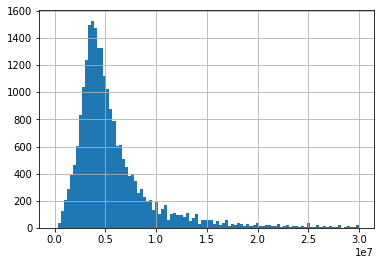

In [62]:
data['last_price'].hist(bins = 100, range=(0,30000000))# график по цене объекта

Цена объекта. Больше всего квартир продаются за 3 - 4 млн. рублей. Средняя и медиана очень рзанятся, это связано с тем, что есть выбросы по цене объекта - в выгрузке присутствуют очень дорогие и дешевые объекты.  

<AxesSubplot:>

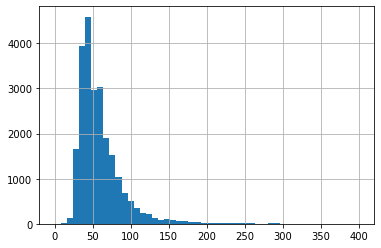

In [63]:
data['total_area'].hist(bins=50,range=(0,400)) #график по плащади объекта

Прощадь объекта. В основном в продаже представлены картиры площадью - 45-49 кв.м. 

<AxesSubplot:>

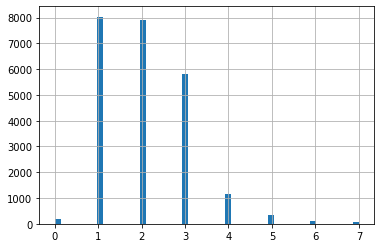

In [64]:
data['rooms'].hist(bins=50,range=(0,7)) #график по количеству комнат

Количество комнат. В основном в продаже однокомнатных и двукомнатных квартир.  

In [65]:
data['ceiling_height'].describe()

count    23642.000000
mean         2.724321
std          0.989416
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

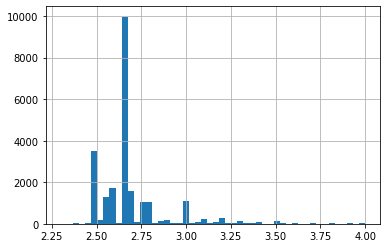

In [66]:
data['ceiling_height'].hist(bins=50,range=(2.3,4)) #график по высоте потолков

(2.3, 4.0)

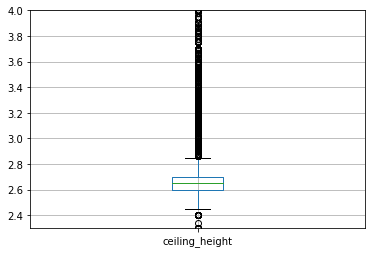

In [67]:
data.boxplot(column='ceiling_height')
plt.ylim(2.3, 4)

### Исключение редких и выбивающихся значений.

К редким значениям я бы отнесла очень дешевые квартиры, квартиры с очень низкими потолками 

In [68]:
data['last_price'].describe()

count    2.364200e+04
mean     6.539333e+06
std      1.089151e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [69]:
data['last_price'].sort_values(ascending=True).head(20)

8793      12190
14911    430000
17456    430000
16274    440000
16219    450000
17676    450000
9581     450000
5698     450000
23484    470000
21912    470000
18867    470000
16032    480000
10782    490000
6859     490000
2097     500000
14295    500000
14904    500000
4405     500000
22430    520000
12607    530000
Name: last_price, dtype: int64

In [70]:
data = data.query("last_price > 500000")

In [71]:
data['last_price'].sort_values(ascending=True).head(20)

22430    520000
12607    530000
1358     550000
13768    550000
1053     550000
11351    550000
7962     550000
7376     550000
22997    560000
8630     560000
19460    560000
13809    565000
10612    580000
8105     585000
15969    590000
10945    600000
6358     600000
23067    600000
21523    600000
11211    600000
Name: last_price, dtype: int64

In [72]:
data['ceiling_height'].describe()

count    23624.000000
mean         2.724378
std          0.989790
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [73]:
data['ceiling_height'].sort_values(ascending=False)

22869    100.00
3148      32.00
22336     32.00
21377     27.50
4876      27.00
          ...  
19329      2.00
552        2.00
16934      1.75
5712       1.20
22590      1.00
Name: ceiling_height, Length: 23624, dtype: float64

In [75]:
data = data.query("ceiling_height > 2.5 ")

In [76]:
data['ceiling_height'].sort_values(ascending=False)

22869    100.00
22336     32.00
3148      32.00
21377     27.50
4876      27.00
          ...  
8495       2.51
14975      2.51
9454       2.51
11190      2.51
15644      2.51
Name: ceiling_height, Length: 20039, dtype: float64

Высота потолков. В основном квартиры продаются с высотой 2,65. Но также имеются выбросы с величиной 100 и 1 метр высотой. 

### Изучение параметра -  время продажи квартиры

In [77]:
data['days_exposition'].describe() #описание столбца

count    17498.000000
mean       183.514059
std        222.157775
min          2.000000
25%         45.000000
50%         97.000000
75%        236.000000
max       1572.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

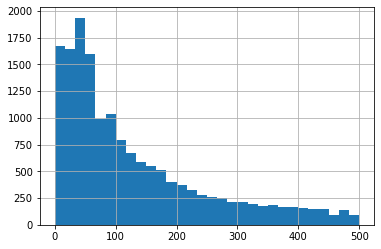

In [78]:
data['days_exposition'].hist(bins=30,range=(0,500)) 

<AxesSubplot:>

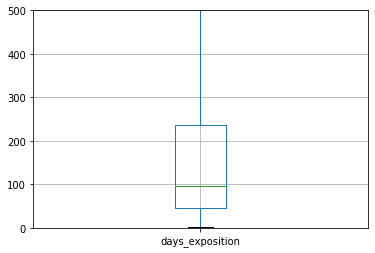

In [79]:
plt.ylim(0,500)
data.boxplot(column='days_exposition') 


<AxesSubplot:>

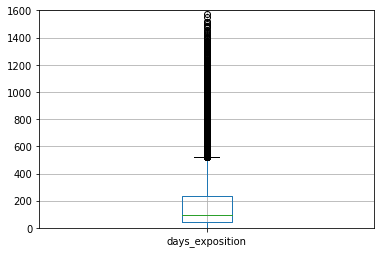

In [80]:
plt.ylim(0,1600) #все выбросы учтены 
data.boxplot(column='days_exposition') 


In [81]:
data.sort_values(by='days_exposition',ascending=False).head()#просмотр квартир с аномальными данными 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m,year_public,month_public,day_of_week_public,floor_category,living_ratio_total,kitchen_ratio_total
1109,1,34878556,95.80,2014-12-09T00:00:00,2,2.65,6,58.30,5,True,...,3,569.0,1572.0,364076,2014,12,1,Другой этаж,0.608559,0.208768
9553,11,10600000,80.00,2014-12-09T00:00:00,3,2.85,17,44.00,9,False,...,0,503.0,1553.0,132500,2014,12,1,Другой этаж,0.550000,0.187500
1885,2,13300000,79.60,2014-12-09T00:00:00,2,3.00,8,42.70,7,False,...,0,503.0,1513.0,167085,2014,12,1,Другой этаж,0.536432,0.226131
20969,18,13300000,133.00,2015-02-11T00:00:00,4,3.00,5,58.00,2,False,...,1,534.0,1512.0,100000,2015,2,2,Другой этаж,0.436090,0.338346
6691,3,4400000,42.98,2014-12-12T00:00:00,1,2.65,5,18.72,1,False,...,3,232.0,1512.0,102373,2014,12,4,Первый этаж,0.435551,0.263146


In [82]:
without_anomaly_days_exposition = data.query('days_exposition < 420')# отчищаем данные от выбросов 

<AxesSubplot:>

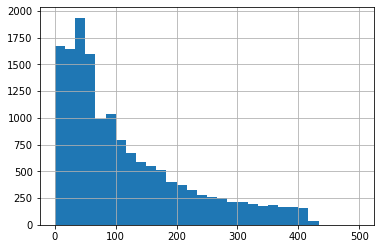

In [83]:
without_anomaly_days_exposition['days_exposition'].hist(bins=30,range=(0,500))

In [84]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()) #заполняем пропущенные значения,
#смотрим на изменение характера данных 
data['days_exposition'].isnull().sum()

0

<AxesSubplot:>

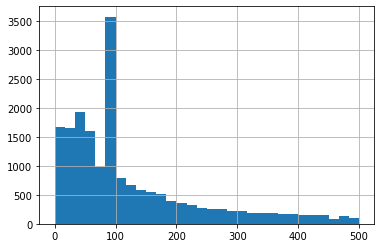

In [85]:
data['days_exposition'].hist(bins=30,range=(0,500)) #график после заполнения данных медианой

In [86]:
data['days_exposition'].describe() #описание столбца, смотрим изменения данных 

count    20039.000000
mean       172.543840
std        209.581265
min          2.000000
25%         46.000000
50%         97.000000
75%        203.000000
max       1572.000000
Name: days_exposition, dtype: float64

Т.к. в предработке данных я не стала прорабатывать пропущенные данные, то сначала провела аналих с пропусками, выявила, что средняя и медиана очень далеки друг от друга, время продажы было сосредаточено в интервале до 100 дней. Самой быстрой продажей - продажа в один день. Самой долгой продажей (если не брать во внимание выбросы 3Q)  -427 дней.

После проработки данных и  заполнения пропущенных значений, исключения аномалий, показатели изменились - уменьшилось среднее значение, став немного ближе в к медианому. И стали видны 4 пика. Самый большой пик- 95 дней, пики - 50 дней, 70 дней и 10 дней


### Факторы,  больше всего влияющие  на стоимость квартиры

In [87]:
data['last_price'].describe() #описание столбца

count    2.003900e+04
mean     6.986404e+06
std      1.172778e+07
min      5.200000e+05
25%      3.550000e+06
50%      4.890000e+06
75%      7.264380e+06
max      7.630000e+08
Name: last_price, dtype: float64

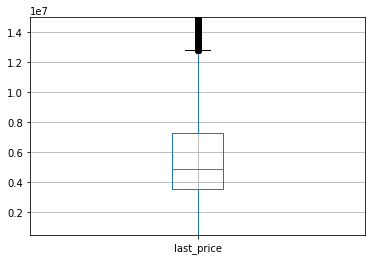

In [88]:
plt.ylim(500000,15000000)
data.boxplot(column = 'last_price')
plt.show()

In [89]:
data['last_price'].min()

520000

In [90]:
data['last_price'].max()

763000000

In [91]:
data['last_price'].median()

4890000.0

In [92]:
data['last_price'].mean()

6986404.318977993

На диаграмме размаха видно, что в выбросы попадают квартиры свыше 11 млн. руб

In [93]:
data.sort_values(by='last_price',ascending=False).head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m,year_public,month_public,day_of_week_public,floor_category,living_ratio_total,kitchen_ratio_total
12971,19,763000000,400.0,2017-09-30T00:00:00,7,2.65,10,250.0,10,False,...,3,756.0,33.0,1907500,2017,9,5,Последний этаж,0.625000,0.022750
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,False,...,2,318.0,106.0,466666,2017,12,2,Последний этаж,0.455222,0.124444
14706,15,401300000,401.0,2016-02-20T00:00:00,5,2.65,9,204.0,9,False,...,1,478.0,393.0,1000748,2016,2,5,Последний этаж,0.508728,0.059850
1436,19,330000000,190.0,2018-04-04T00:00:00,3,3.50,7,95.0,5,False,...,3,285.0,233.0,1736842,2018,4,2,Другой этаж,0.500000,0.210526
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.40,7,258.0,5,False,...,2,198.0,111.0,485436,2017,12,0,Другой этаж,0.417476,0.113269
22831,18,289238400,187.5,2019-03-19T00:00:00,2,3.37,6,63.7,6,False,...,3,188.0,97.0,1542604,2019,3,1,Последний этаж,0.339733,0.161067
16461,17,245000000,285.7,2017-04-10T00:00:00,6,3.35,7,182.8,4,False,...,3,140.0,249.0,857542,2017,4,0,Другой этаж,0.639832,0.104305
13749,7,240000000,410.0,2017-04-01T00:00:00,6,3.40,7,218.0,7,False,...,2,198.0,199.0,585365,2017,4,5,Последний этаж,0.531707,0.097561
5893,3,230000000,500.0,2017-05-31T00:00:00,6,2.65,7,30.0,7,False,...,2,198.0,50.0,460000,2017,5,2,Последний этаж,0.060000,0.080000
8900,13,190870000,268.0,2016-03-25T00:00:00,3,2.65,8,132.0,7,False,...,2,198.0,901.0,712201,2016,3,4,Другой этаж,0.492537,0.149254


Дорогие квартиры существуют, но их их единицы, чтобы выбросы не влияли на общие выводы, считаю нужным единичные и дорогие квартиры исключть из анализа и факторов, влияющих на цены квартиры. Считаю нужным убрать квартиры выше 11 млн. и ниже 1 млн.    

In [94]:
without_anomaly_last_price = data.query('1000000 < last_price < 11000000') #исключение дорогих и дешевых квартир за кв. м. 

Зависимость цены от  площади квартиры 

<AxesSubplot:xlabel='last_price'>

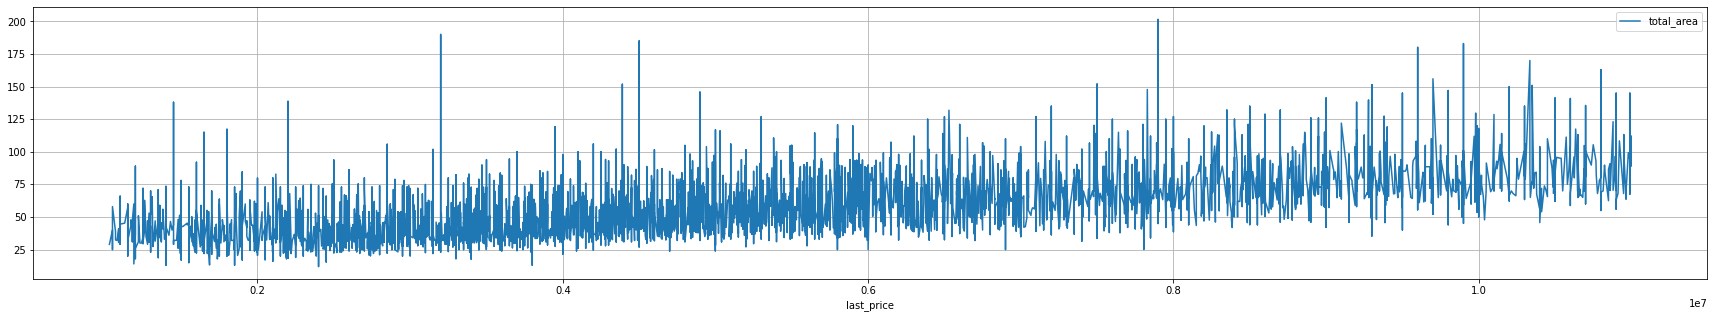

In [95]:
(without_anomaly_last_price
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='-',figsize=(30,5))
)

<AxesSubplot:xlabel='price_for_m', ylabel='total_area'>

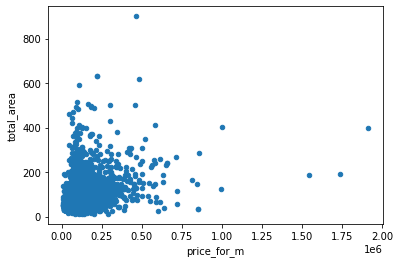

In [96]:
data.plot(x='price_for_m', y='total_area', kind='scatter')


In [97]:
without_anomaly_last_price['last_price'].corr(without_anomaly_last_price['total_area'])

0.6950149438062652

Выявлено, что при увеличении площади, увеличивается стоимость квартиры. Коэфф Пирсона 0.69, он является положительным, зависимость величин имеется. 

Зависимость цены от количества комнат 

<AxesSubplot:xlabel='rooms'>

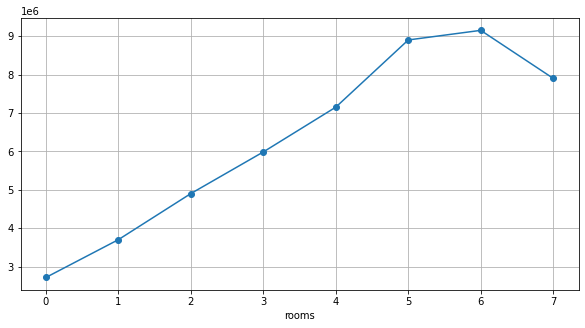

In [98]:
(without_anomaly_last_price
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(10,5),alpha=1)
)


In [99]:
without_anomaly_last_price['last_price'].corr(without_anomaly_last_price["rooms"])

0.47472584836458925

на графике видно, что с уведличением количества комнат, цена увеличивается. Коэффициент Пирсена также положительный, и равен 0,47, зависимость выявлена.


Зависимость цены от этажа 

<AxesSubplot:xlabel='floor_category'>

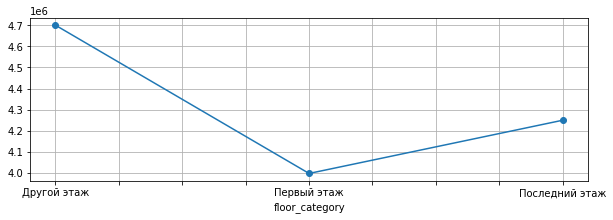

In [100]:
(without_anomaly_last_price
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',style='-o',grid=True,figsize=(10,3),alpha=1))

In [101]:
without_anomaly_last_price['floor'].corr(without_anomaly_last_price['last_price'])

0.08732867304740206

По представленным данным цена не сильно зависит от этажа квартиры. Коэффициент Пирсона 0,08, этот фактор не сильно влияет на стоимость. 

Зависимость цены от центра

<AxesSubplot:xlabel='cityCenters_nearest'>

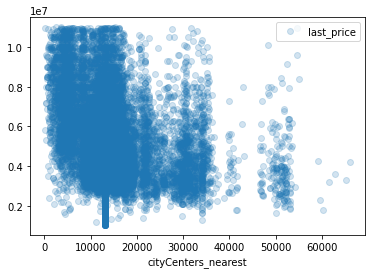

In [102]:
(without_anomaly_last_price
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='last_price',style='o',alpha=0.2))

In [103]:
without_anomaly_last_price['cityCenters_nearest'].corr(without_anomaly_last_price['last_price'])

-0.2373226820991561

Разброс большой, но можно увидеть плотности, которые показывают, что при увеличении расстояния, стоимость уменьшается, опять же не сильно. Об этом говорить и коэф Пирсона. Он отрицательны - 0,23

Анализ дня, месяца, года закрытия объявления

<AxesSubplot:xlabel='day_of_week_public'>

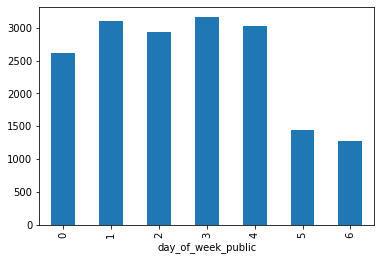

In [104]:
(without_anomaly_last_price
 .groupby('day_of_week_public')['last_price'].count()
 .plot(x='day_of_week_public',y='last_price',kind='bar')
)

Чаще всего объявления закрываются во вторник, четверг и пятницу. Возможно, из-за того, что это просто выходные. 

<AxesSubplot:xlabel='month_public'>

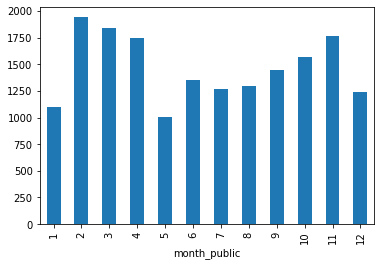

In [105]:
(without_anomaly_last_price
     .groupby('month_public')['last_price'].count()
     .plot(x='month_public',y='last_price',kind='bar')
)

Видно, что объявления меньше всего закрываются в месяцы перед большими праздниками - новым годом, маем, а также после нового года. Возможно, это связано с большими затратами на подарки и отпуск. 

<AxesSubplot:xlabel='year_public'>

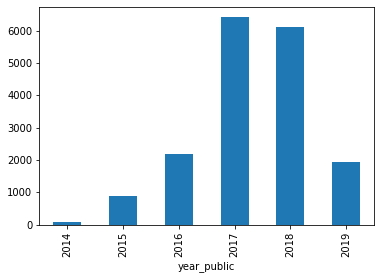

In [106]:
(without_anomaly_last_price
     .groupby('year_public')['last_price'].count()
     .plot(x='year_public',y='last_price',kind='bar')
)

Больше всего продаж было в 2017 -2018 гг. Думаю, это было связано с политической и экономической осбановкой в России. 

In [107]:
import seaborn

In [108]:
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.652249,0.372745,-0.198291
total_area,0.652249,1.000000,0.769646,-0.219482
rooms,0.372745,0.769646,1.000000,-0.184502
cityCenters_nearest,-0.198291,-0.219482,-0.184502,1.000000


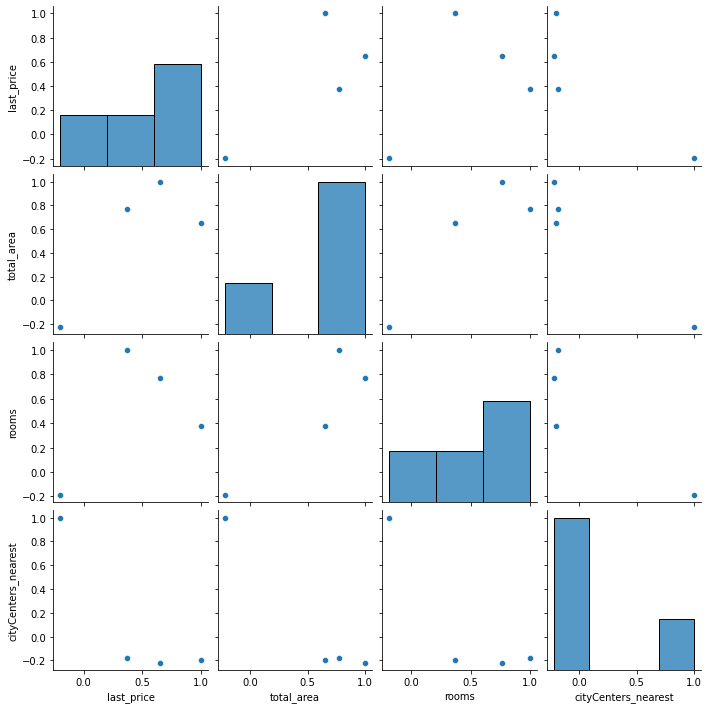

In [109]:
seaborn.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())


При анализе выявлено, что на стоимость квартиры в первую очередь влияет площадь (коэффициент Пирсона 0.65), далее количество комнат (0,37), а зависимость цены от близости центра оказалась не такой значимой и влияющей. Коэффициент отрицательный (-0.19)

Зависимость цены от города расположения

In [110]:
raiting_of_location=without_anomaly_last_price.pivot_table(index='locality_name',values='price_for_m',aggfunc=('count','median'))
raiting_of_location.sort_values(by='count',ascending=False).head(10)
# свод по городам 

,count,median
locality_name,,
Санкт-Петербург,11369.0,102343.0
посёлок Мурино,513.0,85714.0
посёлок Шушары,411.0,76829.0
Всеволожск,363.0,65857.0
посёлок Парголово,312.0,91984.0
деревня Кудрово,297.0,91803.0
Пушкин,260.0,99865.5
Гатчина,233.0,67927.0
Колпино,232.0,74727.5


Ожидаемо, что первое место по количесту объявлений и по стоимости за квадраный метр будет в г. Санкт-Петербург. Десятку замыкает - Выборг. 	  

Изучение предложения квартир

In [111]:
data['cityCenters_nearest_in_km']= data['cityCenters_nearest']/1000 #Добавляем новый столбец в км. 

In [112]:
data['cost_of_km'] = data['price_for_m']/data['cityCenters_nearest_in_km']
#расчет стоимости 

In [113]:
spb_region=data.query('locality_name=="Санкт-Петербург"')
spb_region.head()  # срез по региону

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_m,year_public,month_public,day_of_week_public,floor_category,living_ratio_total,kitchen_ratio_total,cityCenters_nearest_in_km,cost_of_km
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,97.0,120370,2019,3,3,Другой этаж,0.472222,0.231481,16.028,7509.982531
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,558.0,92785,2015,8,3,Другой этаж,0.612500,0.148214,13.933,6659.369841
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,424.0,408176,2015,7,4,Другой этаж,0.188679,0.057233,6.800,60025.882353
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,121.0,100000,2018,6,1,Другой этаж,0.320000,0.410000,8.098,12348.728081
7,5,7915000,71.6,2019-04-18T00:00:00,2,2.65,24,30.0,22,False,...,97.0,110544,2019,4,3,Другой этаж,0.418994,0.263966,11.634,9501.805054


<AxesSubplot:xlabel='cityCenters_nearest_in_km'>

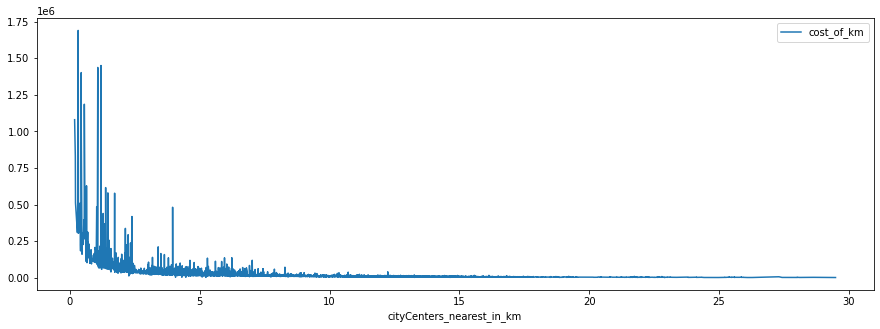

In [114]:
(spb_region
     .sort_values(by='cityCenters_nearest_in_km',ascending=True)
     .plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='-',figsize=(15,5))
)

График зависимости цены 1 кв. м от расстояния центра, видно, что после 10 км от центра цена почти не меняется.

Сегмент квартир в центре города.

In [115]:
spb_region.sort_values(by='cost_of_km',ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_m,year_public,month_public,day_of_week_public,floor_category,living_ratio_total,kitchen_ratio_total,cityCenters_nearest_in_km,cost_of_km
19755,11,2080000,50.7,2017-07-20T00:00:00,2,2.56,14,30.6,8,False,...,14.0,41025,2017,7,3,Другой этаж,0.603550,0.147929,22.902,1791.328268
16787,20,4850000,85.8,2019-04-22T00:00:00,3,3.60,3,49.4,2,False,...,97.0,56526,2019,4,0,Другой этаж,0.575758,0.139860,29.263,1931.654307
12160,8,2450000,43.0,2018-08-14T00:00:00,1,2.75,5,16.0,1,True,...,8.0,56976,2018,8,1,Первый этаж,0.372093,0.211628,29.493,1931.848235
8501,7,4100000,80.0,2017-07-19T00:00:00,3,2.65,4,49.0,1,False,...,53.0,51250,2017,7,2,Первый этаж,0.612500,0.187500,24.972,2052.298574
7732,20,3975000,74.0,2018-08-20T00:00:00,3,3.20,3,43.8,2,False,...,112.0,53716,2018,8,0,Другой этаж,0.591892,0.189189,26.104,2057.768924
18378,9,2600000,46.0,2017-11-10T00:00:00,1,2.65,2,20.0,1,False,...,29.0,56521,2017,11,4,Первый этаж,0.434783,0.326087,26.286,2150.232063
1443,14,2400000,44.0,2017-11-29T00:00:00,2,2.65,3,21.0,1,False,...,55.0,54545,2017,11,2,Первый этаж,0.477273,0.181818,24.429,2232.797085
15181,9,3000000,70.0,2016-03-10T00:00:00,3,2.60,5,40.0,1,False,...,111.0,42857,2016,3,3,Первый этаж,0.571429,0.154286,18.855,2272.977990
6026,19,3900000,64.0,2017-09-30T00:00:00,2,2.80,5,33.0,1,False,...,45.0,60937,2017,9,5,Первый этаж,0.515625,0.156250,25.274,2411.054839
2520,0,2300000,65.0,2017-01-24T00:00:00,3,2.65,5,35.0,1,False,...,16.0,35384,2017,1,1,Первый этаж,0.538462,0.461538,14.647,2415.784802


In [116]:
top_segment =spb_region.query('cityCenters_nearest_in_km < 5 and locality_name == "Санкт-Петербург"') # срез топ сегмента

<AxesSubplot:>

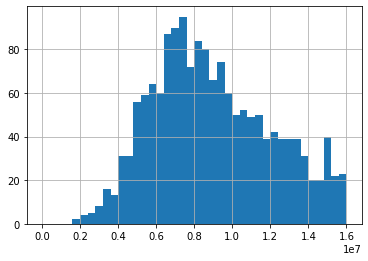

In [117]:
top_segment['last_price'].hist(bins=40, range =(0, 16000000))

Больше всего квартир за 7 мил. 

<AxesSubplot:>

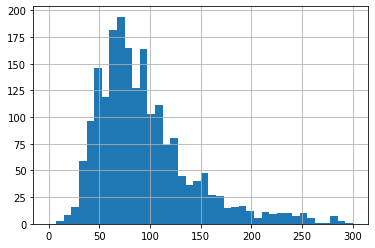

In [118]:
top_segment['total_area'].hist(bins=40, range = (0, 300))

В центральном районе большая часть квартир в районе 60 м кв

<AxesSubplot:>

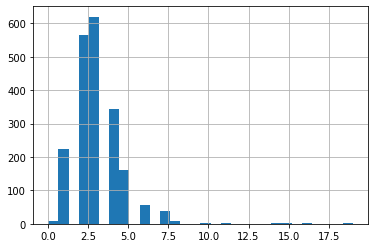

In [119]:
top_segment['rooms'].hist(bins=30)

Больше всего продается 2 -х квартир

<AxesSubplot:>

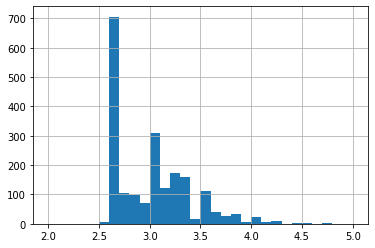

In [120]:
top_segment['ceiling_height'].hist(bins=30,range=(2,5))

Потолки в квартирах - 2,6 преобладает

<AxesSubplot:xlabel='cityCenters_nearest'>

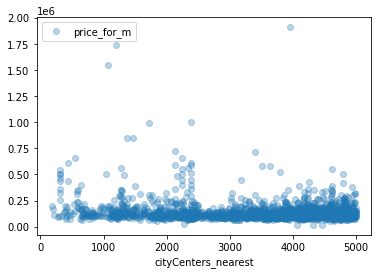

In [121]:
(top_segment
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest',y='price_for_m',style='o',alpha=0.3)
)


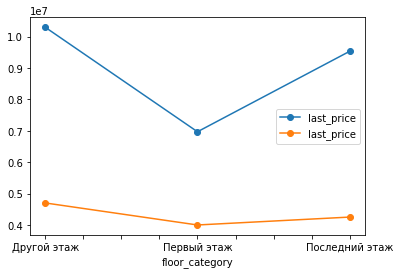

In [122]:
(top_segment
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',style='o-',legend=True)
)


(without_anomaly_last_price
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',style='o-',legend=True)
)

plt.show()


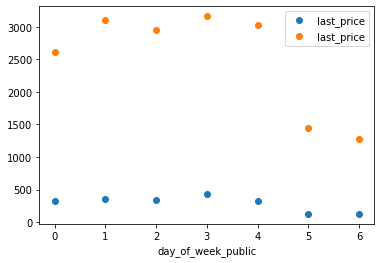

In [123]:
(top_segment
     .groupby('day_of_week_public')['last_price'].count()
     .plot(x='day_of_week_public',y='last_price',style='o',legend=True)
)

(without_anomaly_last_price
     .groupby('day_of_week_public')['last_price'].count()
     .plot(x='day_of_week_public',y='last_price',style='o',legend=True)
)

plt.show()

В течение недели квартиры продаются примерно одинаково. Спад наблюдается к выходным 


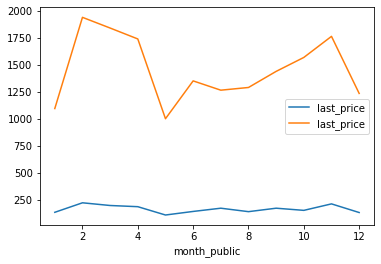

In [124]:
(top_segment
     .groupby('month_public')['last_price'].count()
     .plot(x='month_public',y='last_price',style='-',legend=True)
)
(without_anomaly_last_price
     .groupby('month_public')['last_price'].count()
     .plot(x='month_public',y='last_price',style='-',legend=True)
)

plt.show()

В течениe года квартиры в центре продаются примерно одинаково.

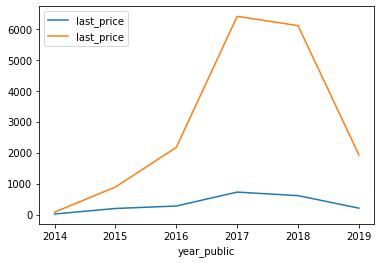

In [125]:
(top_segment
     .groupby('year_public')['last_price'].count()
     .plot(x='year_public',y='last_price',style='-',legend=True)
)
(without_anomaly_last_price
     .groupby('year_public')['last_price'].count()
     .plot(x='year_public',y='last_price',style='-',legend=True)
)

plt.show()

как было отмечено ранее увеличение продаж был в 2018, на мой взгляд в связи особой экономической и политической обстановкой.

In [126]:
top_segment[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.549058,0.263521,-0.082634
total_area,0.549058,1.000000,0.735045,-0.043961
rooms,0.263521,0.735045,1.000000,-0.065653
cityCenters_nearest,-0.082634,-0.043961,-0.065653,1.000000


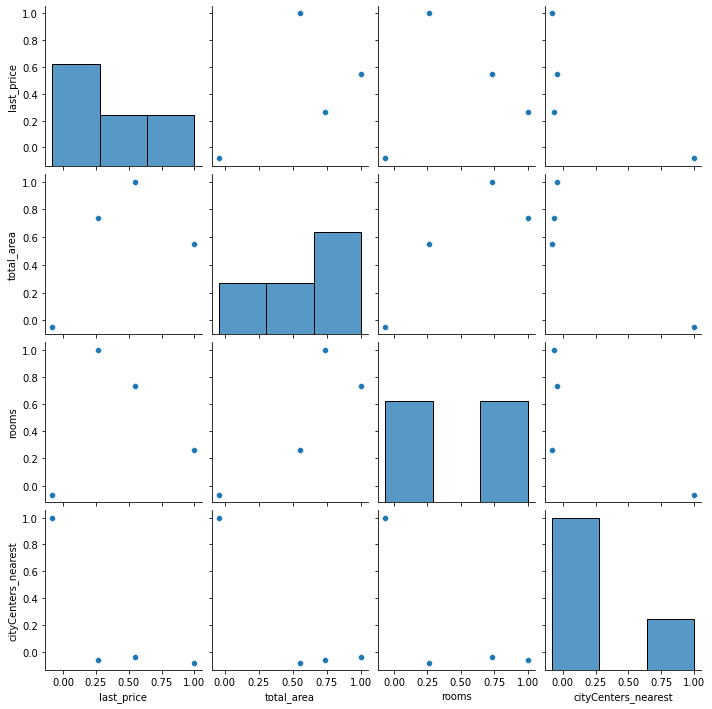

In [127]:
seaborn.pairplot(top_segment[['last_price','total_area', 'rooms', 'cityCenters_nearest']].corr())

## Общий вывод

Рассмотрев выгрузку с объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, пришла к выводу, что безусловно больше всего квартир в продаже представлено именно в городе федерального значения. Квратиры в самом Санкт-Петербурге условно можно разделить на премиум сегмент и оставльные. Их основной отличающий признак - цена. 
 
Были выделены основные факторы, влияющие на цену в большей или мньшей степени: квадратура, количество комнат, географическое расположение.

На стоимость большенства квартир (я их определила, как "остальные") в первую очередь влияет площадь (коэффициент Пирсона 0.65), далее количество комнат (0,37), а зависимость цены от близости центра оказалась не такой значимой и влияющей. Коэффициент отрицательный (-0.19)

На стоимость квартир премиум сегмента также влияет площадь - коэффициент 0.54, количество комнат - 0.26, а расположение (0,08) не является значимым (что не удивительно, ведь их расположение менее 5 км от ценра города) 

Также ои схожи в том, что больше всего квартир продается в будние дни, выявлен рост продаж в 2018 г., для себя это объясняю внутренними и внешними факторами России. Высота потолков в двух сегментах одинаковая. Из "остальных" квартир хотелось бы отметить, что популярнее всего 1-2 комнатные. Также популярнее квартиры любого этажа, кроме первого. 